<a href="https://colab.research.google.com/github/salnuraqidah/machine-learning/blob/main/Prediksi_harga_saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


prediksi saham bentuk data timeseries\
sumber data : https://finance.yahoo.com/quote/META/history?p=META 
Time Period:Nov 03, 2021 - Nov 03, 2022\
Show : Historical Prices\
Frequency:Daily

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/META.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,28353000
1,2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,20786500
2,2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,22495300
3,2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,26872800
4,2021-11-08,344.420013,344.790009,338.339996,338.619995,338.619995,18342500
...,...,...,...,...,...,...,...
248,2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600
249,2022-10-28,99.580002,100.849998,97.510002,99.199997,99.199997,95928300
250,2022-10-31,98.220001,99.320000,92.599998,93.160004,93.160004,121361400
251,2022-11-01,94.330002,97.489998,93.550003,95.199997,95.199997,110189600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


**DATA VISUALIZATION**

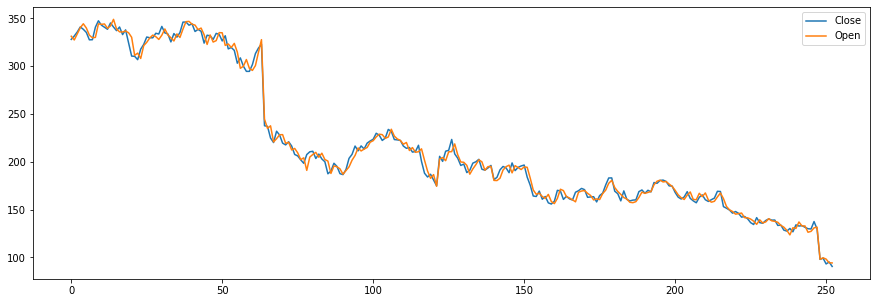

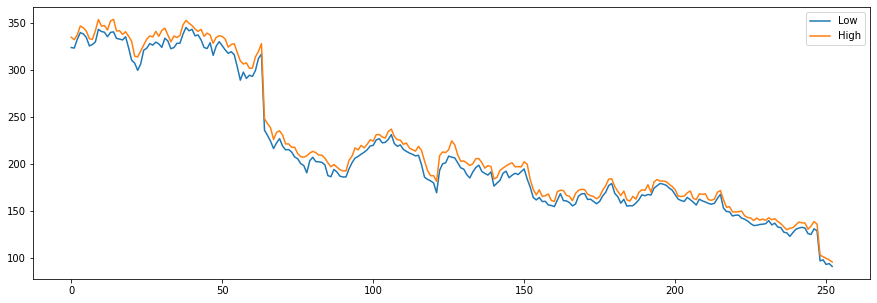

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['Open'], label='Open')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(df['Low'], label='Low')
plt.plot(df['High'], label='High')
plt.legend()

plt.show()

**Select input / output menggunakan autocorrelation function**

In [6]:
df_close = df.loc[:,['Close']]

In [7]:
df_close

,Close
0,328.079987
1,331.619995
2,335.850006
3,341.130005
4,338.619995
...,...
248,97.940002
249,99.199997
250,93.160004
251,95.199997


In [8]:
import statsmodels.api as sm

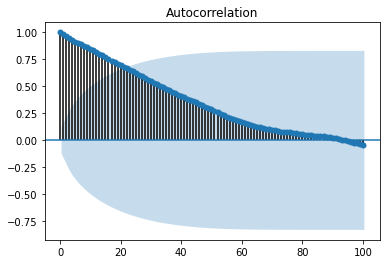

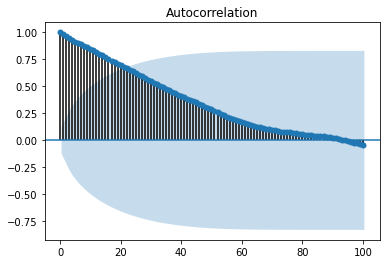

In [9]:
sm.graphics.tsa.plot_acf(df_close, lags=100)

graphic diatas menunjukkan point data yang berada di luar area bayangan berarti data tersebut signifikan. kita bisa ambil max 20 data

**Preprocessing data**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mm = MinMaxScaler()
df_new = mm.fit_transform(df_close)

In [12]:
df_new[:5]

array([[0.92420819],
       [0.93798147],
       [0.95443937],
       [0.97498252],
       [0.9652167 ]])

In [13]:
def steps(data,step):
  panjang = len(data) - step
  data_new = data[:panjang,:]
  for i in range(1, step+1):
    data_new = np.hstack((data_new, data[i:panjang+i, :]))
  return data_new 

prediktor1 -> t1, t2, t3
response1 -> t4

prediktor2 -> t2, t3, t4
response2 -> t5

prediktor3 -> t3, t4, t5
response3 -> t6
.
.
.
n

In [14]:
dat = steps(df_new,3) # menggunakan 3 input dan 1 output

In [15]:
dat

array([[0.92420819, 0.93798147, 0.95443937, 0.97498252],
       [0.93798147, 0.95443937, 0.97498252, 0.9652167 ],
       [0.95443937, 0.97498252, 0.9652167 , 0.95257177],
       [0.97498252, 0.9652167 , 0.95257177, 0.92249637],
       [0.9652167 , 0.95257177, 0.92249637, 0.92288535],
       [0.95257177, 0.92249637, 0.92288535, 0.97404878],
       [0.92249637, 0.92288535, 0.97404878, 1.        ],
       [0.92288535, 0.97404878, 1.        , 0.98210253],
       [0.97404878, 1.        , 0.98210253, 0.97358179],
       [1.        , 0.98210253, 0.97358179, 0.96548908],
       [0.98210253, 0.97358179, 0.96548908, 0.99120687],
       [0.97358179, 0.96548908, 0.99120687, 0.97451565],
       [0.96548908, 0.99120687, 0.97451565, 0.9598864 ],
       [0.99120687, 0.97451565, 0.9598864 , 0.97471014],
       [0.97451565, 0.9598864 , 0.97471014, 0.94381759],
       [0.9598864 , 0.97471014, 0.94381759, 0.96292118],
       [0.97471014, 0.94381759, 0.96292118, 0.9101237 ],
       [0.94381759, 0.96292118,

In [16]:
X = dat[:,:3]
y = dat[:,-1:]

In [17]:
y.shape

(250, 1)

**Train test split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

**Modelling**

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(15, input_dim=3,activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, input_dim=3,activation='sigmoid')) # menggunakan sigmoid karena tidak menghitung probabilitas

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                60        
                                                                 
 dense_1 (Dense)             (None, 40)                640       
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error','mean_absolute_percentage_error'])

In [24]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
16/16 [==============================] - 2s 28ms/step - loss: 0.0750 - mean_squared_error: 0.0750 - mean_absolute_percentage_error: 3099199.5000 - val_loss: 0.0698 - val_mean_squared_error: 0.0698 - val_mean_absolute_percentage_error: 65.2755
Epoch 2/50
16/16 [==============================] - 0s 13ms/step - loss: 0.0701 - mean_squared_error: 0.0701 - mean_absolute_percentage_error: 3086797.2500 - val_loss: 0.0652 - val_mean_squared_error: 0.0652 - val_mean_absolute_percentage_error: 64.8833
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0650 - mean_squared_error: 0.0650 - mean_absolute_percentage_error: 3017255.2500 - val_loss: 0.0601 - val_mean_squared_error: 0.0601 - val_mean_absolute_percentage_error: 63.4747
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0594 - mean_squared_error: 0.0594 - mean_absolute_percentage_error: 2942918.0000 - val_loss: 0.0541 - val_mean_squared_error: 0.0541 - val_mean_absolute_percentage_e

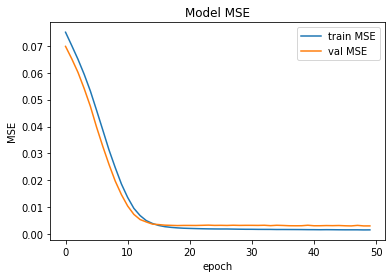

In [25]:
plt.plot(history.history['loss'], label='train MSE')
plt.plot(history.history['val_loss'], label='val MSE')
plt.title('Model MSE')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

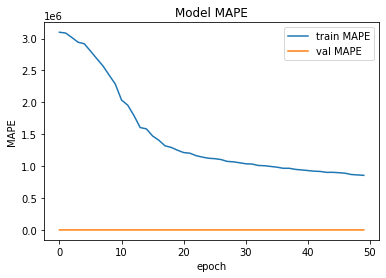

In [26]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val MAPE')
plt.title('Model MAPE')
plt.xlabel('epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

**Predict Data Test**

In [27]:
pred = model.predict(x_test)
pred.ravel()

2/2 [==============================] - 0s 14ms/step


array([0.844228  , 0.4272623 , 0.8879452 , 0.25842315, 0.53950024,
       0.3209408 , 0.33224848, 0.45391145, 0.21156959, 0.9102353 ,
       0.25718105, 0.2437388 , 0.16100073, 0.26418203, 0.915746  ,
       0.16667487, 0.5895862 , 0.39932534, 0.24282113, 0.3853156 ,
       0.84369165, 0.15335388, 0.37829092, 0.38608435, 0.37126058,
       0.86503625, 0.927938  , 0.9277394 , 0.17038849, 0.5686841 ,
       0.38524958, 0.2467179 , 0.44847393, 0.149293  , 0.2587773 ,
       0.9176536 , 0.2820027 , 0.91440475, 0.4329336 , 0.5686704 ,
       0.87427056, 0.48094457, 0.86691296, 0.507672  , 0.24959467,
       0.92552817, 0.32433727, 0.2849465 , 0.2690066 , 0.8972417 ],
      dtype=float32)

In [28]:
mm.inverse_transform(pred).ravel()

array([307.5235 , 200.35497, 318.75967, 156.95993, 229.20236, 173.02821,
       175.93451, 207.20432, 144.91762, 324.48868, 156.64069, 153.18575,
       131.92041, 158.44008, 325.90503, 133.37878, 242.07545, 193.17459,
       152.94989, 189.57382, 307.38562, 129.95502, 187.76833, 189.7714 ,
       185.9614 , 312.8716 , 329.03864, 328.98758, 134.33325, 236.70319,
       189.55685, 153.95143, 205.80678, 128.9113 , 157.05093, 326.39532,
       163.02034, 325.5603 , 201.81259, 236.69968, 315.24503, 214.15237,
       313.35397, 221.02187, 154.69081, 328.41925, 173.90117, 163.77696,
       159.68008, 321.14908], dtype=float32)

In [29]:
mm.inverse_transform(y_test).ravel()

array([294.640015, 197.649994, 323.      , 169.350006, 222.330002,
       205.729996, 179.470001, 216.490005, 146.289993, 318.149994,
       160.029999, 159.929993, 131.529999, 168.960007, 333.73999 ,
       141.610001, 224.910004, 196.639999, 160.389999, 186.630005,
       313.26001 , 132.800003, 183.830002, 190.779999, 198.619995,
       294.630005, 345.299988, 346.220001, 133.789993, 231.839996,
       196.229996, 157.160004, 202.970001, 130.289993, 170.570007,
       347.559998, 172.190002, 329.75    , 210.479996, 222.949997,
       306.839996, 188.070007, 319.      , 208.279999, 169.149994,
       338.619995, 183.169998, 167.110001, 163.940002, 237.759995])

**Cek Akurasi**

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [31]:
r2_score(pred,y_test)

0.9474954143469541

In [32]:
mean_absolute_error(pred,y_test)

0.039394622574010094

In [33]:
mean_squared_error(pred,y_test)

0.0038740309871535183

In [34]:
mean_absolute_percentage_error(pred,y_test)

0.08622750226983705

**Plot Hasil**

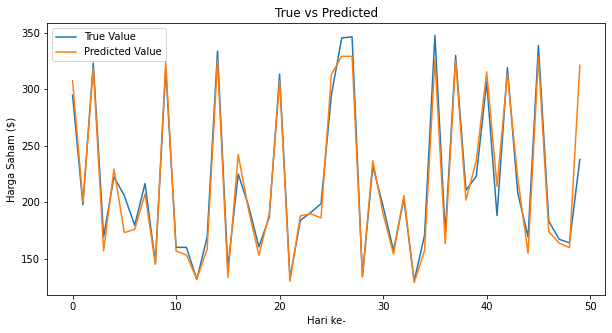

In [35]:
plt.figure(figsize=(10,5))
plt.plot(mm.inverse_transform(y_test).ravel(), label='True Value')
plt.plot(mm.inverse_transform(pred).ravel(), label='Predicted Value')
plt.title('True vs Predicted')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Saham ($)')
plt.legend()
plt.show()